## Problem 1
### The graph of a cubic function passes through the points $(-3, 6.8),(0.5,14.5),(2,-21.2)$, and $(5,10)$.

##### (a) Write the cubic expression as $f=ax^3+bx^2+cx+d$ and solve a system of equations to find the coefficients (do NOT use curve-fitting!)

In [ ]:
from sympy import * # this way I don't even need to type sp (cuz I'm lazy)

# list of points (x, y)
points = [(-3, 6.8), (0.5, 14.5), (2, -21.2), (5, 10)]

# matrix representation of the system of equations
M = Matrix([[point[0]**3, point[0]**2, point[0], 1, point[1]] for point in points])
display(M)

Matrix([
[  -27,    9,  -3, 1,   6.8],
[0.125, 0.25, 0.5, 1,  14.5],
[    8,    4,   2, 1, -21.2],
[  125,   25,   5, 1,    10]])

To find the coefficients of the cubic equation, we use the included reduce row echelon form (rref) function of the matrix that's included by the sympy library

In [2]:
M_rref = M.rref()
display(M_rref[0])

Matrix([
[1, 0, 0, 0,   1.6],
[0, 1, 0, 0,  -4.4],
[0, 0, 1, 0, -21.2],
[0, 0, 0, 1,  26.0]])

Thus we have our coefficients, and our function is

In [3]:
x = symbols('x')
f = 1.6*x**3 -4.4*x**2 - 21.2*x + 26
display(f)

1.6*x**3 - 4.4*x**2 - 21.2*x + 26

##### (b) Use the symbolic plot command to plot the function on the domain $x \in [-4,6]$

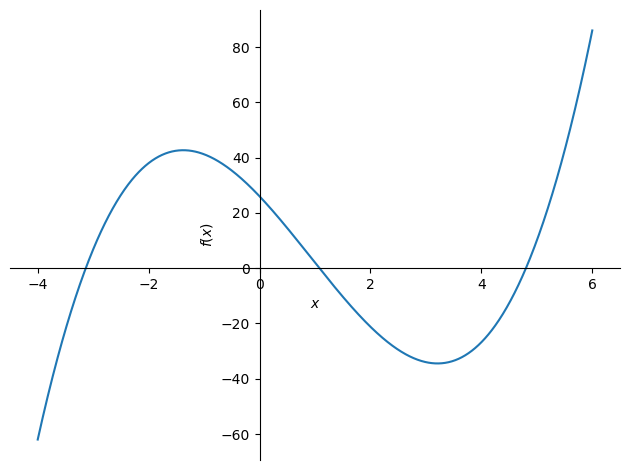

In [4]:
plot(f, (x, -4, 6))

##### (c) Use Python to find the local extrema and the inflection point. Express your answers in point form. Then show that the $x$-coordinate of the inflection point is the average of the $x$-coordinates of the local extrema.

We first calculate the first derivative and set it to 0 to find the critical points

In [13]:
fp = diff(f, x) # first derivative
print(f"the first derivative of the function is {fp}")

crit_pts = solve(fp, x) # solving the first derivative for 0 gives us the critical points

for crit_pt in crit_pts:
  y_val = f.evalf(subs={x: crit_pt}) # y value of the function at the critical point
  print(f"{(crit_pt, y_val)} is a critical point of the function")

the first derivative of the function is 4.8*x**2 - 8.8*x - 21.2
(-1.37613608203293, 42.6718892021985) is a critical point of the function
(3.20946941536627, -34.4681854984948) is a critical point of the function


Then we calculate the second derivative and evaluate it at the critical points to determine if they are local minima or maxima, as well as set it to 0 to find the inflection point(s)

In [14]:
fpp = diff(f, x, 2) # second derivative
print(f"the second derivative of the function is {fpp}")

for crit_pt in crit_pts:
  val_at_cp = fpp.evalf(subs={x: crit_pt})
  if val_at_cp > 0:
    print(f"x = {crit_pt} is a local minimum since the second derivative {val_at_cp} > 0")
  elif val_at_cp < 0:
    print(f"x = {crit_pt} is a local maximum since the second derivative {val_at_cp} < 0")
  elif val_at_cp == 0:
    print(f"We don't know what x = {crit_pt} is, since the second derivative is {val_at_cp} = 0")

the second derivative of the function is 9.6*x - 8.8
x = -1.37613608203293 is a local maximum since the second derivative -22.0109063875162 < 0
x = 3.20946941536627 is a local minimum since the second derivative 22.0109063875162 > 0


In [18]:
infl_pts = solve(fpp, x) # solving the second derivative for 0 gives us the inflection points

for infl_pt in infl_pts:
  y_val = f.evalf(subs={x: infl_pt}) # y value of the function at the inflection point
  print(f"{(infl_pt, y_val)} is an inflection point of the function")

avg_crit_pts = sum(crit_pts) / len(crit_pts) # the arithmetic mean of the x values of the critical points
print(f"{avg_crit_pts} is the arithmetic mean of the x values of the critical points")

print("By inspection, they look the same, but in general it is bad practice to check for equality of floats")
print(f"For instance if you evaluate (0.1+0.2) == 0.3 you get {(0.1+0.2) == 0.3}")

(0.916666666666667, 4.10185185185185) is an inflection point of the function
0.916666666666667 is the arithmetic mean of the x values of the critical points
By inspection, they look the same, but in general it is bad practice to check for equality of floats
For instance if you evaluate (0.1+0.2) == 0.3 you get False


##### (d) Find the equation of the line tangent to the curve at $x=2$ and replot the curve and the tangent line on the same axes

The slope of the tangent line at $x=2$ is just the derivative evaluated at $x=2$. We can then find the equation of the line by solving for the constant term that matches the function at the same point.

In [23]:
slope = fp.evalf(subs={x: 2})
y_val = f.evalf(subs={x: 2})
const_term = y_val - slope*2
tan_line_at_2 = slope*x + const_term
print(f"The tangent line at x=2 is {tan_line_at_2}")

The tangent line at x=2 is 18.0 - 19.6*x


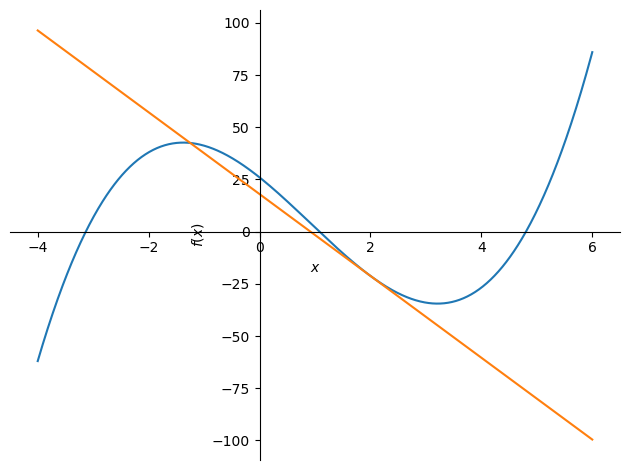

In [24]:
p1 = plot(f, (x, -4, 6), show=False)
p2 = plot(tan_line_at_2, (x, -4, 6), show=False)
p1.append(p2[0])
p1.show()